In [1]:
!pip install opendatasets --upgrade
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset'
od.download(dataset_url)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rashadmmdv
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [01:19<00:00, 36.5MB/s]


In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [3]:
len(os.listdir('new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'))

38

In [4]:
train_datagen = ImageDataGenerator(zoom_range = 0.5, shear_range = 0.3, preprocessing_function=preprocess_input, horizontal_flip = True)

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)


In [5]:
train = train_datagen.flow_from_directory(directory = 'new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                          target_size = (256,256),
                                          batch_size = 32)
val = val_datagen.flow_from_directory(directory = 'new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                          target_size = (256,256),
                                          batch_size = 32)

Found 70295 images belonging to 38 classes.
Found 70295 images belonging to 38 classes.


In [6]:
t_img , label = train.next()

In [7]:
def plotImage(img_arr, label):
  for im,l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show

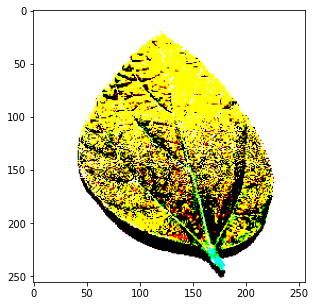

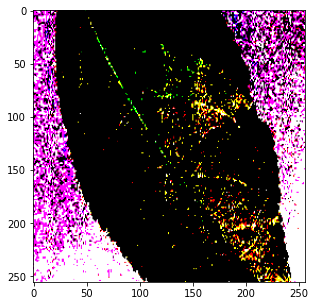

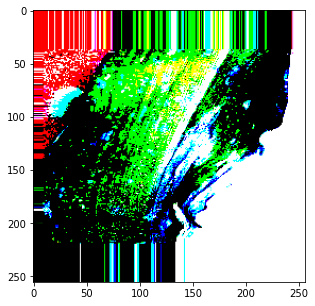

In [8]:
plotImage(t_img[:3], label[3:])

In [9]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [10]:
base_model = VGG19(input_shape=(256,256,3), include_top = False)

80150528/80134624 [==============================] - 1s 0us/step


In [11]:
for layer in base_model.layers:
  layer.trainable = False

In [12]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [13]:
X = Flatten()(base_model.output)
X = Dense(units = 38, activation = 'softmax')(X)

model = Model(base_model.input, X)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [15]:
model.compile(optimizer = 'adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor = "val_accuracy", min_delta = 0.01, patience = 3, verbose = 1)
mc = ModelCheckpoint(filepath = "best_model.h5", onitor = "val_accuracy", min_delta = 0.01, patience = 3, verbose = 1, save_best_only = True)

cb = [es,mc]

In [17]:
his = model.fit_generator(train , steps_per_epoch=16, epochs=50,
                          verbose = 1, validation_data = val, validation_steps=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
16/16 [==============================] - 30s 797ms/step - loss: 25.2167 - accuracy: 0.1777 - val_loss: 17.4438 - val_accuracy: 0.3887
Epoch 2/50
16/16 [==============================] - 12s 777ms/step - loss: 15.5846 - accuracy: 0.3945 - val_loss: 9.8913 - val_accuracy: 0.5684
Epoch 3/50
16/16 [==============================] - 12s 777ms/step - loss: 10.7426 - accuracy: 0.5234 - val_loss: 9.1971 - val_accuracy: 0.6230
Epoch 4/50
16/16 [==============================] - 12s 777ms/step - loss: 10.4436 - accuracy: 0.5957 - val_loss: 6.5038 - val_accuracy: 0.7207
Epoch 5/50
16/16 [==============================] - 12s 778ms/step - loss: 10.1710 - accuracy: 0.6055 - val_loss: 5.6615 - val_accuracy: 0.7598
Epoch 6/50
16/16 [==============================] - 14s 877ms/step - loss: 11.4397 - accuracy: 0.5957 - val_loss: 7.0443 - val_accuracy: 0.7109
Epoch 7/50
16/16 [==============================] - 13s 788ms/step - loss: 8.9657 - accuracy: 0.6406 - val_loss: 4.5493 - val_accuracy:

In [18]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show(*args, **kw)>

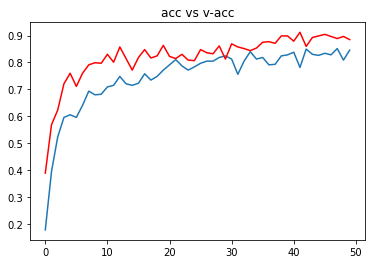

In [19]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title("acc vs v-acc")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

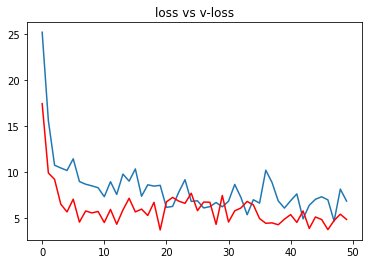

In [20]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title("loss vs v-loss")
plt.show

In [21]:
ref = dict(zip(list(train.class_indices.values()) , list(train.class_indices.keys())))

In [26]:
def prediction(path):
  img = load_img(path, target_size=(256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis=0)
  pred = np.argmax(model.predict(img))
  print(f'Bu bitkinin xəstə olub olmaması: {ref[pred]}')

In [27]:
path = '/content/photo_5253613729319338289_y.jpg'
prediction(path)

Bu bitkinin xəstə olub olmaması: Pepper,_bell___Bacterial_spot
